# ECS7020P mini-project submission-**Basic Component**



# 1 Author

**Student Name**:  Ishwar Joshi \
**Student ID**:  230194814



In [27]:
#Install the mlend and other necessarry libraries
!pip install mlend
!pip install spkit

In [28]:
#Import all the necessarry libraries
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from skimage import io
from skimage import transform
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
#setting up the basedirectory where all the data is stored
baseDir = '/content/drive/MyDrive/Data/MLEnd/yummy'
baseDir

'/content/drive/MyDrive/Data/MLEnd/yummy'

In [38]:
#Check the list of folders in base directory
os.listdir(baseDir)

['MLEndYD_images_small', 'MLEndYD_image_attributes_small.csv']

In [31]:
#Visualize the structure of our dataframe containg all the text parameters of our image
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_small.csv').set_index('filename')
MLENDYD_df

Dish_name  \
filename                                                       
00001.jpg                                      steak_&_fries   
00002.jpg                                   beef_burger_meal   
00003.jpg                chicken_burger_with_fries_and_wings   
00004.jpg                               fried_rice_with_curd   
00005.jpg                                     fish_and_chips   
...                                                      ...   
00095.jpg  breaded_chicken_with_katsu_curry_sauce_rice_&_...   
00096.jpg                            chicken_wrap_with_fries   
00097.jpg                                     butter_chicken   
00098.jpg                                     fish_and_chips   
00099.jpg                                            burghul   

              Home_restaurant     Cuisine  \
filename                                    
00001.jpg          resturaunt    american   
00002.jpg          restaurant    american   
00003.jpg          restaurant    american   
00004.jpg                home      indian   
00005.jpg             tcr_bar     british   
...                       ...         ...   
00095.jpg           the_curve    japanese   
00096.jpg  roosters_piri_piri  portuguese   
00097.jpg          restaurant      indian   
00098.jpg          restaurant     british   
00099.jpg                home     turkish   

                                                 Ingredients        Diet  \
filename                                                                   
00001.jpg                            steak,fries,mixed_salad     non-veg   
00002.jpg                        chips,burger,chicken_nugget     non-veg   
00003.jpg  fried_chicken_breast,lettuce,ketchup,sesame_se...     non-veg   
00004.jpg            rice,onion,potato,tomato,olive_oil,curd  vegetarian   
00005.jpg              cod,beer,flour,tartare_sauce,peas,oil  vegetarian   
...                                                      ...         ...   
00095.jpg              chicken,curry,rice,greens,bell_pepper     non-veg   
00096.jpg  tortilla_wrap,chicken,olive_oil,piri_piri_sauc...     non-veg   
00097.jpg  garlic,tomato,onion,white_rice,naan_bread,cash...     non-veg   
00098.jpg                         breaded_cod,fried_potatoes     non-veg   
00099.jpg                           butter,olive_oil,burghul  vegetarian   

          Healthiness_rating How_much_did_you_like_it Rice_Chips Benchmark_A  
filename                                                                      
00001.jpg            neutral            strongly_like      chips        Test  
00002.jpg          unhealthy                     like      chips       Train  
00003.jpg          unhealthy                     like      chips       Train  
00004.jpg            neutral                     like       rice       Train  
00005.jpg            neutral            strongly_like      chips        Test  
...                      ...                      ...        ...         ...  
00095.jpg            healthy            strongly_like       rice       Train  
00096.jpg            healthy            strongly_like      chips       Train  
00097.jpg            neutral                     like       rice       Train  
00098.jpg            healthy            strongly_like      chips       Train  
00099.jpg       very_healthy                  neutral       rice        Test  

[99 rows x 9 columns]

In [32]:
#Setting up path to all images to extract and visulaize images
sample_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/*.jpg'
files = glob.glob(sample_path)
len(files)

99

(-0.5, 1207.5, 907.5, -0.5)

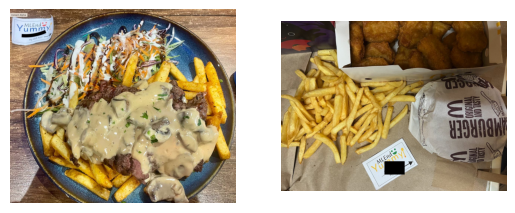

In [33]:
#Plotting the first 2 images to see if the path set above is correct
I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/00001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/00002.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

# 2 Problem formulation

**Macine Learning Problem** :-  Using the MLEnd Yummy Dataset, build a machine learning pipeline that takes as an input a photo of a dish that has either rice or chips and predicts whether the picture has rice or chips.

**What's Interesting About It?** :- Building an ML model which can distinguish between different kinds of food is pretty intriguing, especially because it is difficult to distinguish between Rice and Chips as they are similar in texture colour and mostly served with other foods.

# 3 Machine Learning pipeline

Following are the steps I perform to form a pipeline,

**1.Import and download all the libraries/yummy small dataset**

Downloading the photos that I will be using for training and testing model

**2.Visualize the data**

Visualizing the data to understand the dataset and its parameters

**3.Split dataset into train and test data**

Splitting the dataset into train and test data.

**4.Transform all the images in equal sizes**

From visualizing the images we can see that images have different sizes this could make our feature extration a bit difficult hence we needed to perform image transformation where we can transfrom allthe images to equal sizes, this is done in **Preprocess** class that I have defined, I am using make_it_square and resize mthods to achieve this. I will be including this class as the first step of the **sklearn pipeline.** the code for these steps can be found below
I have splitted my data into train and test datasets using method provided by mlend. Further steps in pipeline are explained below.

**In the next stage of pipeline I am performing following steps.**

**5.Extract and Normalize features**

In the next stage I am extracting features from the above normalized images using 2 methods for this

**a). Get_Yellow_Component:-**

In this method I am extracting the yellow componetn from the image this is done to identiyfy chips from the image as they will always be yellow in color

**b). GMLC_Feature:-**

In this method I am extrating 2 featurs dissimilarity and correlation to identify the dissimilarities in adjusant pixels, this will help to identify weather the picture is of rice or not as picture with rice will have more dissimilarities in nearby pixels

After extracting these 2 features I am using **standard scalar** from sklearn library to **normalize** it as can be seen 3rd step of the pipeline.

**6.Train classifier based on features**

The next step is to train classifer I have build **2 pipelines with 2 different classifiers 1 with linearSVC and another with RandomForestClassifier** I will be training these 2 models based on the features extracted in above steps and then will be making predictions using my train data and comparing the results of both models. code for it can be found in subsequent sections

**7.Check results accuracy confusion matrix.**

At the end I am compairing the results of RandomForestClassifier and LinearSvc plotting the confusions matrix for both and identifying which model works better

# 4 Transformation stage
 **Feature Extraction**

To predict whether a dish contains rice or chips using 200x200 pixel photos, we face a high-dimensional space with 120,000 dimensions. Given our limited dataset size, feature extraction becomes crucial to **reduce dimensionality**. The functions **get_yellow_component** and **GMLC_features** are designed to extract three key image features, serving as a basis for a more manageable predictor space.

# 5 Modelling

The chosen machine learning model is the **Support Vector Classifier (SVC)**, selected for its proficiency in handling intricate decision boundaries, resilience against overfitting, and efficacy in high-dimensional spaces. This model is particularly well-suited for moderately sized datasets and adept at capturing nonlinear relationships between features.

Additionally, the **Random Forest Classifier** serves as an excellent alternative to SVC. Notably, it provides a feature importance measure, facilitating the identification of influential features within the dataset. This insight proves valuable for feature selection and a comprehensive understanding of the dataset's characteristics.

## 6 Methodology

I am performing following steps to train and test my models and evaluate their performance.

**Model Training:** The Support Vector Classifier (SVC) and Random Forest Classifier will be trained on the preprocessed and normalized dataset to learn patterns and relationships.

**Validation:** The trained models will be assessed on a separate testing dataset to ensure their ability to generalize and make accurate predictions on unseen data.

**Performance Assessment:** Model performance will be evaluated using key metrics such as accuracy, precision, recall, F1 score, and the ROC curve. The confusion matrix will provide a detailed breakdown of true positives, true negatives, false positives, and false negatives, offering insights into the models' predictive capabilities.

# 7 Dataset

I am using the MLEnd Small dataset for this model as it has the pictures of only rice and chips which is my input model, in addition it will make the preprocessing and train and test data split easier. I am perform following steps to visualize and preprocess my data as explained below


**Train and Test Split** :

Create train and test Datasets

In this Starter kit we will consider the problem of predicting whether a dish has rice or chips using a picture of the dish as the predictor.

To solve this section, let us create two datasets, one for the training task and another one for the test task. We will use the `yummy_small_load` function included in our `mlend` library for this, and will specify which dataset each sample should belong to, by using the column 'Benchmark_A' in the CSV file:


In [34]:
#Splitting our dataset into train and test dataset by using
TrainSet, TestSet, Map = yummy_small_load(datadir_main=baseDir,train_test_split='Benchmark_A')

Total 99 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images_small/


In [35]:
#Storing all the images xpaths and Y_encoded values into train and test variables
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

**Visualisation** :  In this step I am plotting the few images under Rice and chips labels

Rice


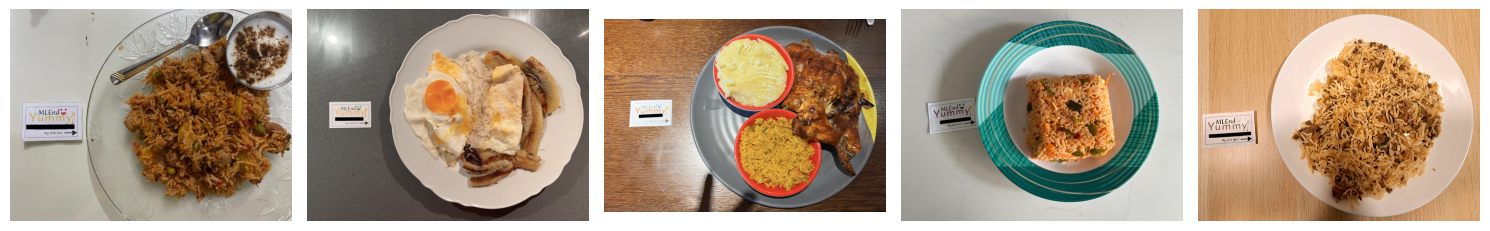

Chips


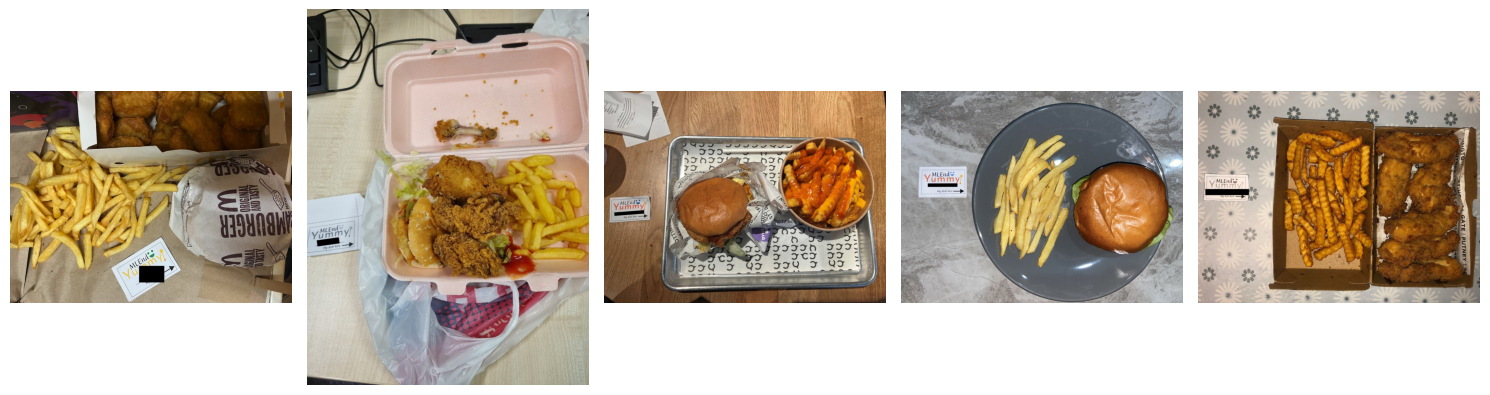

In [36]:
#Visualizing the sample images under Rice and chips class
Chips_Img = np.array(X_train_paths)[Y_train==0]
Rice_Img = np.array(X_train_paths)[Y_train==1]

print('Rice')
plt.figure(figsize=(15,5))
for k,file in enumerate(Rice_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

print('Chips')
plt.figure(figsize=(15,5))
for k,file in enumerate(Chips_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

**Preprocessing** :

From the above images we can see that shape and size of all the images are different this can make feature extraction difficult for us hence I am resizing and reshaping all the images

In [37]:
#Defining class for preprocessing the images
class Preprocess(BaseEstimator, TransformerMixin):

    def __init__(self,pad=0):
        self.pad = pad

    def fit(self, X, y=None):
        return self

    def transform(self, X):
      X_train=[]
      for k,file in enumerate(X) :
        sp.utils.ProgBar_JL(k,len(X),L=50,color='blue')
        I = plt.imread(file)
        I = make_it_square(I, pad=self.pad)
        I = resize_img(I,size=[200,200])
        X_train.append(I)
      return  X_train

def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

**Feature Extraction**

In [13]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops

class FeatureExtractionTransformer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
      return self

  def transform(self, X):
      features = []
      for k,file in enumerate(X):
          sp.utils.ProgBar_JL(k,len(X),L=50,color='blue')
          f1 = get_yellow_component(file)
          f2, f3 = GMLC_features(file)
          features.append([f1, f2, f3])
      return np.array(features)
def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                      symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2

def showConfMat(CM, labels = ['Chips','Rice']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

# 8 Results



**Defining pipeline for skleran**

In [14]:
scaler = StandardScaler()

In [15]:
pipeline_SVC = Pipeline([
    ('Preprocss', Preprocess()),
    ('feature_extraction', FeatureExtractionTransformer()),
    ('scaler', scaler),
    ('model', LinearSVC(C=1))])

In [16]:
# Fit the pipeline on the training data
pipeline_SVC.fit(X_train_paths, Y_train)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!


Pipeline(steps=[('Preprocss', Preprocess()),
                ('feature_extraction', FeatureExtractionTransformer()),
                ('scaler', StandardScaler()), ('model', LinearSVC(C=1))])

In [17]:
train_prediction=pipeline_SVC.predict(X_train_paths)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!


In [18]:
# Predictions on the testing set
test_predictions = pipeline_SVC.predict(X_test_paths)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|29\29|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|29\29|
Done!


In [19]:
pipeline_RFC = Pipeline([
    ('Preprocss', Preprocess()),
    ('feature_extraction', FeatureExtractionTransformer()),
    ('scaler', scaler),
    ('model', RandomForestClassifier(n_estimators=5,max_depth=3,random_state=110))])

In [20]:
# Fit the pipeline on the training data
pipeline_RFC.fit(X_train_paths, Y_train)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!


Pipeline(steps=[('Preprocss', Preprocess()),
                ('feature_extraction', FeatureExtractionTransformer()),
                ('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=3, n_estimators=5,
                                        random_state=110))])

In [21]:
train_prediction_RFC=pipeline_RFC.predict(X_train_paths)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|70\70|
Done!


In [22]:
# Predictions on the testing set
test_predictions_RFC = pipeline_RFC.predict(X_test_paths)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|29\29|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|29\29|
Done!


**Calculating the accuracies for train and test dataset for LinearSVC**

In [23]:
ytp = train_prediction
ysp = test_predictions

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Training Accuracy:	 0.6285714285714286
Test  Accuracy:	 0.5862068965517241


**Plotting the confusion matrix for LinearSVC**

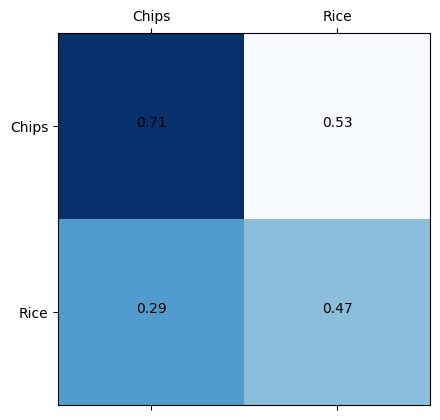

In [24]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

**Calculating the accuracies for train and test dataset for RandomForest**

In [25]:
ytp_RFC = train_prediction_RFC
ysp_RFC = test_predictions_RFC

train_accuracy_RFC = np.mean(ytp_RFC==Y_train)
test_accuracy_RFC  = np.mean(ysp_RFC==Y_test)

print('Training Accuracy:\t',train_accuracy_RFC)
print('Test  Accuracy:\t',test_accuracy_RFC)

Training Accuracy:	 0.7714285714285715
Test  Accuracy:	 0.5517241379310345


**Plotting the confusion matrix for RandomForest**

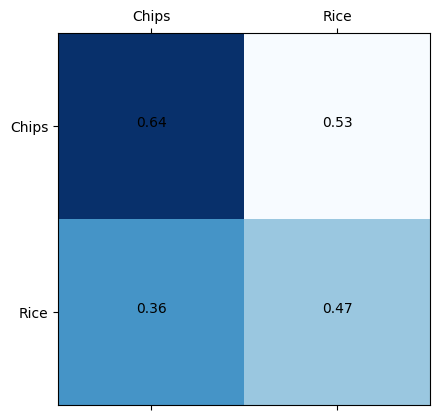

In [26]:
Ac_RFC = np.mean(ysp_RFC[Y_test.astype(int)==0]==0)
Ar_RFC = np.mean(ysp_RFC[Y_test.astype(int)==1]==1)

Mc_RFC = np.mean(ysp_RFC[Y_test.astype(int)==0]==1)

Mr_RFC = np.mean(ysp_RFC[Y_test.astype(int)==1]==0)

CM_RFC = np.array([[Ac_RFC, Mc_RFC],[Mr_RFC, Ar_RFC]])

showConfMat(CM_RFC)

**Printing Performance matrix matrix for LinearSVC**

In [41]:
from sklearn.metrics import classification_report
#Printing the performance metrics for LinearSVC classifier for train and test data
print(classification_report(Y_train,ytp,labels = ['0','1']))
print(classification_report(Y_test,ysp,labels = ['0','1']))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63        35
           1       0.63      0.63      0.63        35

   micro avg       0.63      0.63      0.63        70
   macro avg       0.63      0.63      0.63        70
weighted avg       0.63      0.63      0.63        70

              precision    recall  f1-score   support

           0       0.56      0.71      0.63        14
           1       0.64      0.47      0.54        15

   micro avg       0.59      0.59      0.59        29
   macro avg       0.60      0.59      0.58        29
weighted avg       0.60      0.59      0.58        29



/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/pytho

**Printing Performance matrix matrix for RandomForest**

In [42]:
#Printing the performance metrics for RandomForestClassifier classifier for train and test data
print(classification_report(Y_train,ytp_RFC,labels = ['0','1']))
print(classification_report(Y_test,ysp_RFC,labels = ['0','1']))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.79      0.74      0.76        35

   micro avg       0.77      0.77      0.77        70
   macro avg       0.77      0.77      0.77        70
weighted avg       0.77      0.77      0.77        70

              precision    recall  f1-score   support

           0       0.53      0.64      0.58        14
           1       0.58      0.47      0.52        15

   micro avg       0.55      0.55      0.55        29
   macro avg       0.56      0.55      0.55        29
weighted avg       0.56      0.55      0.55        29



/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/pytho

**For LinearSvc Model following are train and test accuracies:-**

Training Accuracy:	 0.6285714285714286

Test  Accuracy:	 0.5862068965517241

**For RandomForestClassifier Model following are train and test accuracies:-**

Training Accuracy:	 0.7714285714285715

Test  Accuracy:	 0.5517241379310345

# 9 Conclusions

Your conclusions, suggestions for improvements, etc should go here

**Conclusion**

**a)** From the above results we can conclude that LinearSVC model is performing better when compaired to RandomForest classifier, although RandomForest is providing better accuracy for training dataset its acuuracy for test dataset has declined drastically which is an indication that it is overfitting on the training dataset.

**b)** From the confuion matrix and the performance matrix plotted for both models we can see that our model is making better predictions for chips as compaired to rice, which indicates that there may be biasness in our data

**Suggestions For Improvements**

To try to improve performance of our model of RandomForest classifier we can try changing the parameters passed to the model such as **n_estimators, max_depth etc** further to reduce the biasness of our model we can perform few steps such as adding one more feature as part of feature extraction, increasing the size of our dataset etc.